## Credit Card Fraud Detection Project

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [ ]:
# Load the csv file

dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check for null values

dataframe.isnull().values.any()

False

In [ ]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


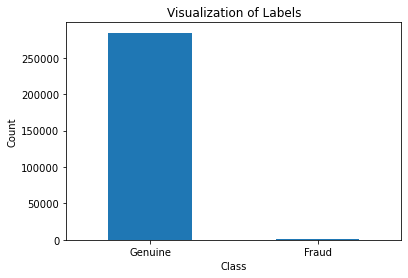

In [ ]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
# Perform Scaling
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Split the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

In [ ]:
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.9098814414288


In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [ ]:
print("Random Forest Score: ", random_forest_score)


Random Forest Score:  99.96137776061234


In [ ]:
# Naive Bayes
naive_bayes= GaussianNB()
naive_bayes.fit(train_X,train_Y)

predictions_nb=naive_bayes.predict(test_X)
naive_bayes_score=naive_bayes.score(test_X, test_Y) * 100

In [ ]:
print("Naive Bayes score: ", naive_bayes_score)

Naive Bayes score:  97.80906569291808


In [ ]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [ ]:
# Plot confusion matrix for Decision Trees

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85262    45]
 [   32   104]]


Confusion matrix, without normalization


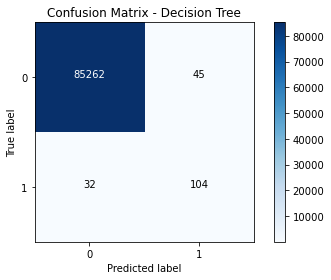

In [ ]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [ ]:
# Plot confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[85300     7]
 [   26   110]]


Confusion matrix, without normalization


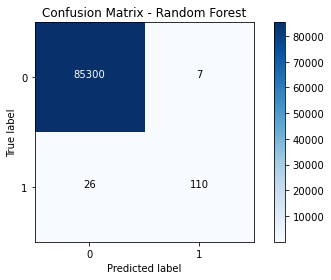

In [ ]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [ ]:
# Plot confusion matrix for Decision Trees

confusion_matrix_nb = confusion_matrix(test_Y, predictions_nb.round())
print("Confusion Matrix - Naive bayes")
print(confusion_matrix_nb)

Confusion Matrix - Naive bayes
[[83456  1851]
 [   21   115]]


Confusion matrix, without normalization


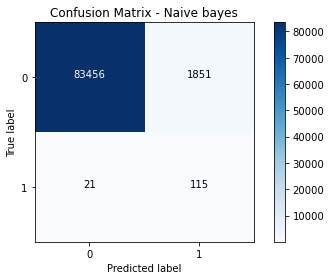

In [ ]:
plot_confusion_matrix(confusion_matrix_nb, classes=[0, 1], title= "Confusion Matrix - Naive bayes")

In [ ]:
# The below function prints the following necesary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))


In [ ]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99910
Precision: 0.69799
Recall: 0.76471
F1-score: 0.72982


In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99961
Precision: 0.94017
Recall: 0.80882
F1-score: 0.86957


In [ ]:
print("Evaluation of Naive Bayes Model")
print()
metrics(test_Y, predictions_nb.round())

Evaluation of Naive Bayes Model

Accuracy: 0.97809
Precision: 0.05849
Recall: 0.84559
F1-score: 0.10942


Clearly, Random Forest model works better than Decision Trees

But, if we clearly observe our dataset suffers a serious problem of **class imbalance**.
The genuine (not fraud) transactions are more than 99% with the fraud transactions constituting of 0.17%.

With such kind of distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there are more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. **Over sampling** is one of them.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model.

Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short.

In [ ]:
#

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [ ]:
# Build the Random Forest classifier on the new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

rf_predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [ ]:
print(" rf_resampled score : ",random_forest_score_resampled)

 rf_resampled score :  99.98768971035648


In [ ]:
# Visualize the confusion matrix

cm_rf_resampled = confusion_matrix(test_Y, rf_predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_rf_resampled)

Confusion Matrix - Random Forest
[[85129    20]
 [    1 85439]]


Confusion matrix, without normalization


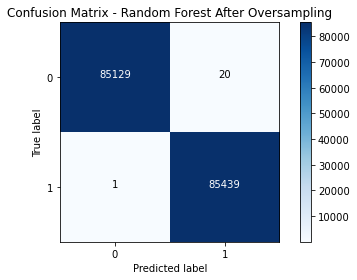

In [ ]:
plot_confusion_matrix(cm_rf_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, rf_predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99988
Precision: 0.99977
Recall: 0.99999
F1-score: 0.99988


In [ ]:
# Build the Decision Tree classifier on the new dataset

dt_resampled = DecisionTreeClassifier()
dt_resampled.fit(train_X, train_Y)

dt_predictions_resampled = dt_resampled.predict(test_X)
decision_tree_resampled = dt_resampled.score(test_X, test_Y) * 100

In [ ]:
print("dt resampled score: ",decision_tree_resampled)

dt resampled score:  99.79834573155361


In [ ]:
# Visualize the confusion matrix

dt_cm_resampled = confusion_matrix(test_Y, dt_predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(dt_cm_resampled)

Confusion Matrix - Random Forest
[[84903   246]
 [   98 85342]]


Confusion matrix, without normalization


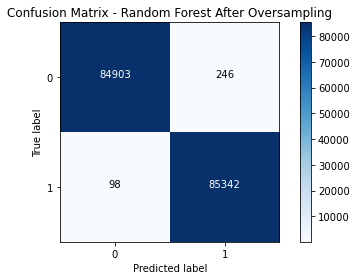

In [ ]:
plot_confusion_matrix(dt_cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [ ]:
print("Evaluation of Decision Tree  Model")
print()
metrics(test_Y, dt_predictions_resampled.round())

Evaluation of Decision Tree  Model

Accuracy: 0.99798
Precision: 0.99713
Recall: 0.99885
F1-score: 0.99799


In [ ]:
# Build the Naive Bayes classifier on the new dataset

nb_resampled = GaussianNB()
nb_resampled.fit(train_X, train_Y)

nb_predictions_resampled = nb_resampled.predict(test_X)
nb_resampled_score = nb_resampled.score(test_X, test_Y) * 100

In [ ]:
print("nb resampled score: ",nb_resampled_score)

nb resampled score:  91.48596920082772


In [ ]:
# Visualize the confusion matrix

nb_cm_resampled = confusion_matrix(test_Y, nb_predictions_resampled.round())
print("Confusion Matrix - naive bayes")
print(nb_cm_resampled)

Confusion Matrix - naive bayes
[[83020  2129]
 [12395 73045]]


Confusion matrix, without normalization


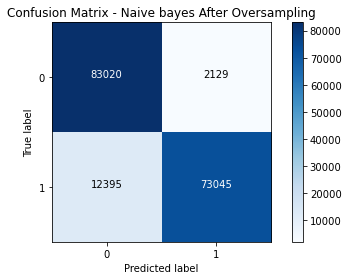

In [ ]:
plot_confusion_matrix(nb_cm_resampled, classes=[0, 1], title= "Confusion Matrix - Naive bayes After Oversampling")

In [ ]:
print("Evaluation of naive bayes Model")
print()
metrics(test_Y, nb_predictions_resampled.round())

Evaluation of naive bayes Model

Accuracy: 0.91486
Precision: 0.97168
Recall: 0.85493
F1-score: 0.90957
